<a href="https://colab.research.google.com/github/Akshayaa3/Kovaico/blob/main/kovaico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Look into dataset provide 4-5 key insight
forcast local route, light rail, peak servuce , rapiroute,school for next 7 days

1 page tech report on chosen algorithm and various model parameters




Loading the `transport_dataset` from Google Drive into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset from the specified path into a DataFrame, then display the head and info to verify.



In [ ]:
import pandas as pd



from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


/tmp/ipython-input-2830708110.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Other'].fillna(0, inplace=True)


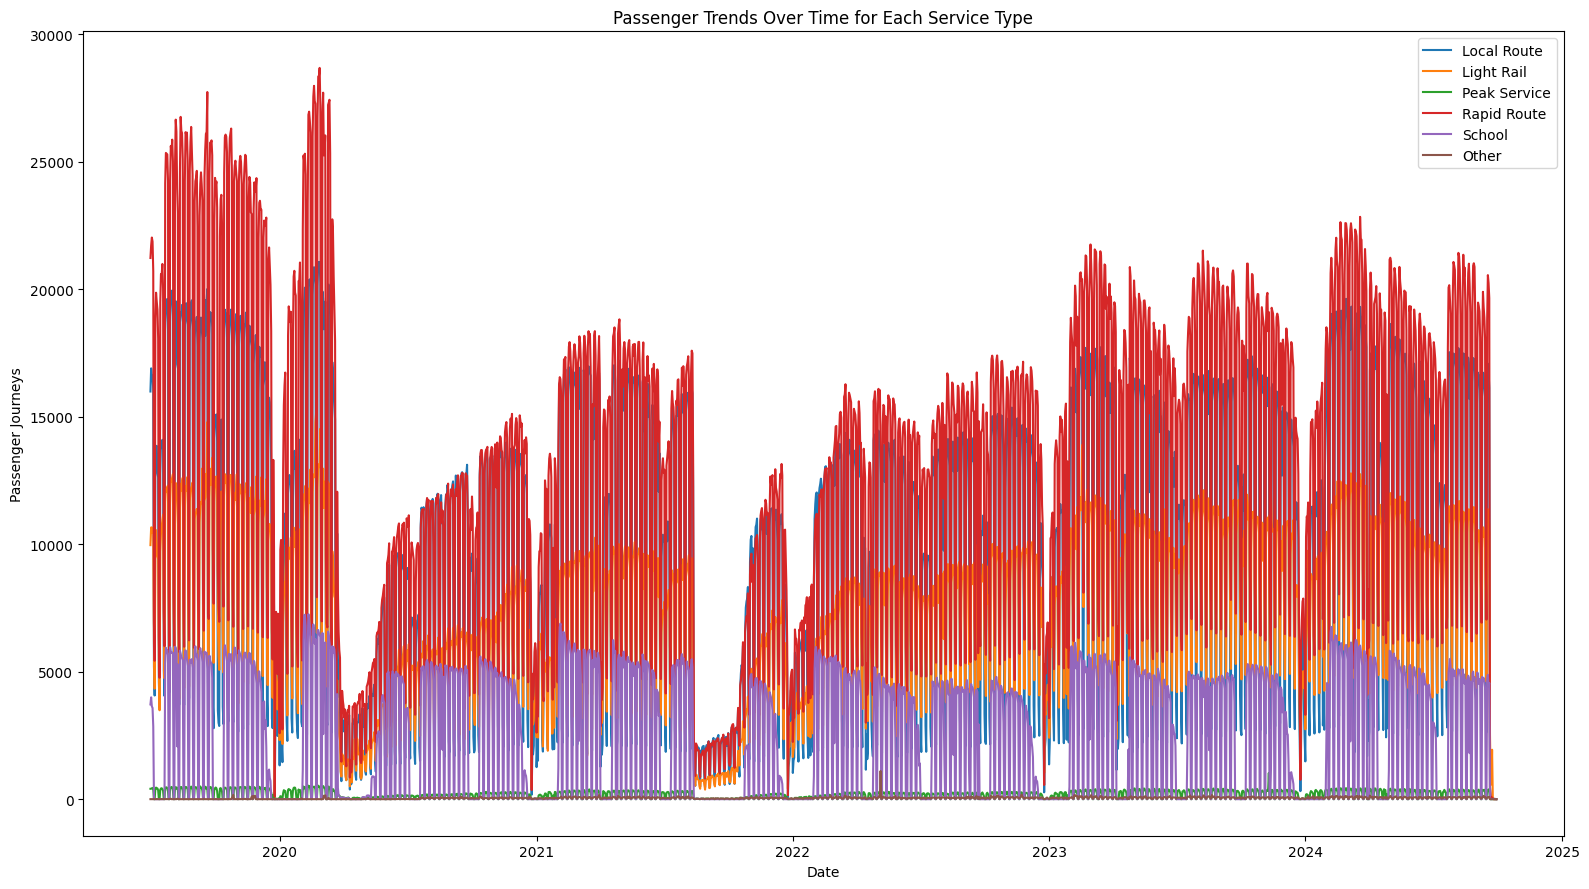

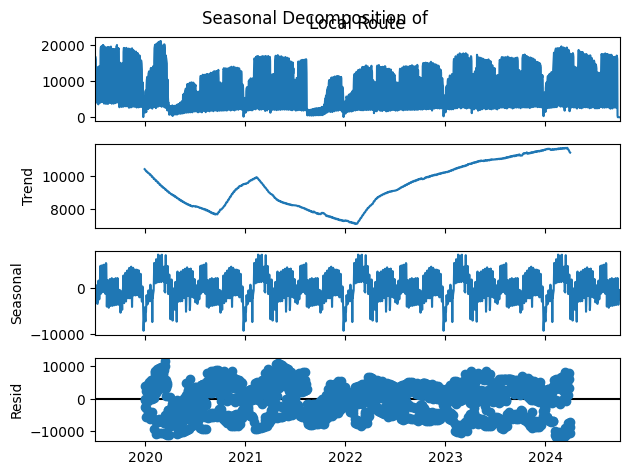

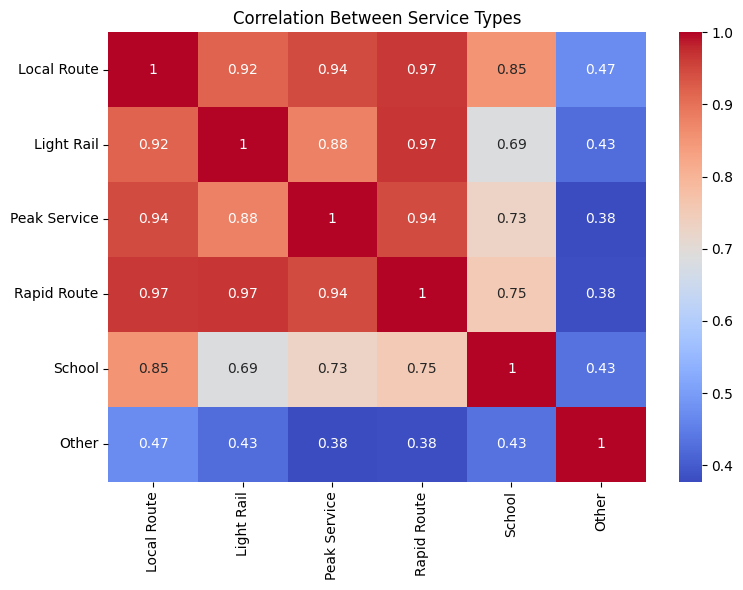

Monthly Mean (Head):
             Local Route    Light Rail  Peak Service   Rapid Route  \
Date                                                                 
2019-07-31  13116.354839   9440.032258    307.096774  17903.290323   
2019-08-31  14735.387097  10206.967742    307.064516  20101.096774   
2019-09-30  14146.633333  10177.800000    306.800000  19484.666667   
2019-10-31  13152.645161  10332.580645    294.806452  19792.645161   
2019-11-30  13773.766667  10050.600000    302.700000  19364.333333   

                 School      Other  
Date                                
2019-07-31  2057.193548   1.483871  
2019-08-31  3852.225806   1.129032  
2019-09-30  3722.966667   0.800000  
2019-10-31  2563.096774  10.645161  
2019-11-30  3824.066667  18.966667  

Annual Mean (Head):
             Local Route   Light Rail  Peak Service   Rapid Route  \
Date                                                                
2019-12-31  13140.543478  9685.032609    287.201087  18462.288043   
2

/tmp/ipython-input-2830708110.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = df[service_types].resample('M').mean()
/tmp/ipython-input-2830708110.py:49: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_means = df[service_types].resample('Y').mean()


In [ ]:
# EDA and Visualization for Public Transport Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load Data
file_path = '/content/drive/MyDrive/skinlesion/Tdata.csv' # Update with the correct path to your file
df = pd.read_csv(file_path)

# Parse 'Date' and sort
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Fill missing 'Other' values
df['Other'].fillna(0, inplace=True)

service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# 1. Trend Visualization for Service Types
plt.figure(figsize=(16,9))
for col in service_types:
    plt.plot(df.index, df[col], label=col)
plt.title('Passenger Trends Over Time for Each Service Type')
plt.xlabel('Date')
plt.ylabel('Passenger Journeys')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Seasonality Analysis on Local Route (can change to any service type)
decomp = seasonal_decompose(df['Local Route'], model='additive', period=365)
decomp.plot()
plt.suptitle('Seasonal Decomposition of')
plt.show()

# 3. Correlation Heatmap of Passenger Counts
corr = df[service_types].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Service Types')
plt.tight_layout()
plt.show()

# 4. Aggregate Annual and Monthly Means
monthly_means = df[service_types].resample('M').mean()
annual_means = df[service_types].resample('Y').mean()

print("Monthly Mean (Head):")
print(monthly_means.head())
print("\nAnnual Mean (Head):")
print(annual_means.head())

print("\nCorrelations:")
print(corr)

EDA on data reveals High Correlation between different kinds of transport (Local route, Light Rail) suggesting that users may have used more than one of these services.

#The Peak service and Rapid Route are an aggregate of available services recorded when transport is more used and is mostly compraised of Local route and light rail

In [ ]:
service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

for service in service_types:
    print(f"Processing service type: {service}")

Processing service type: Local Route
Processing service type: Light Rail
Processing service type: Peak Service
Processing service type: Rapid Route
Processing service type: School
Processing service type: Other



Analyzing series: Other


,Other
count,1918.000000
mean,42.937956
std,41.761911
min,0.000000
25%,14.000000
50%,39.000000
75%,67.750000
max,1105.000000


Outlier counts for Other (IQR, z>3): 10 3


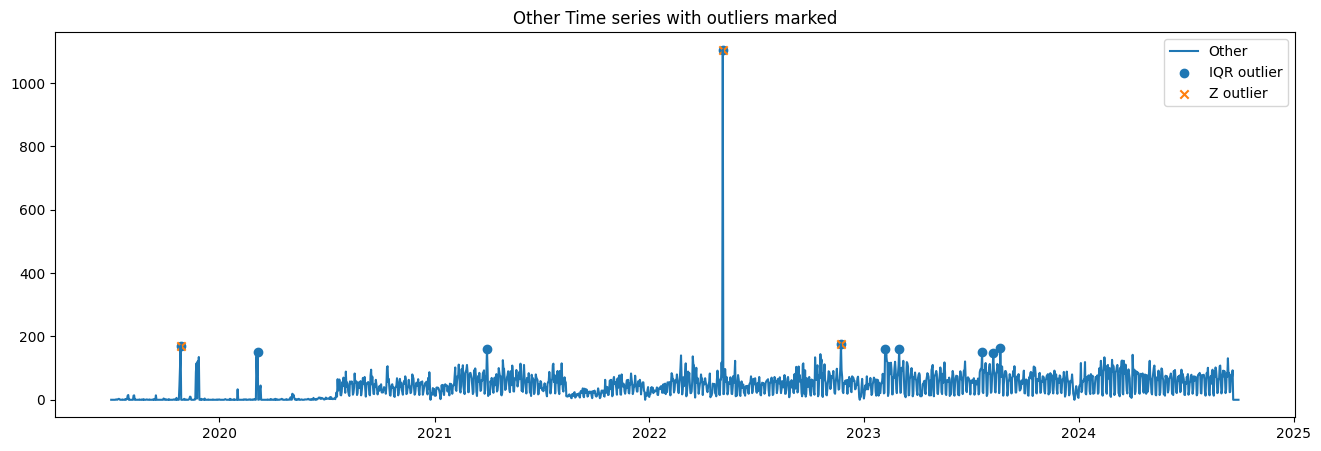

Using frequency: D


/tmp/ipython-input-2383585766.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series_filled = series.asfreq(freq, method='pad').fillna(method='ffill').fillna(method='bfill')


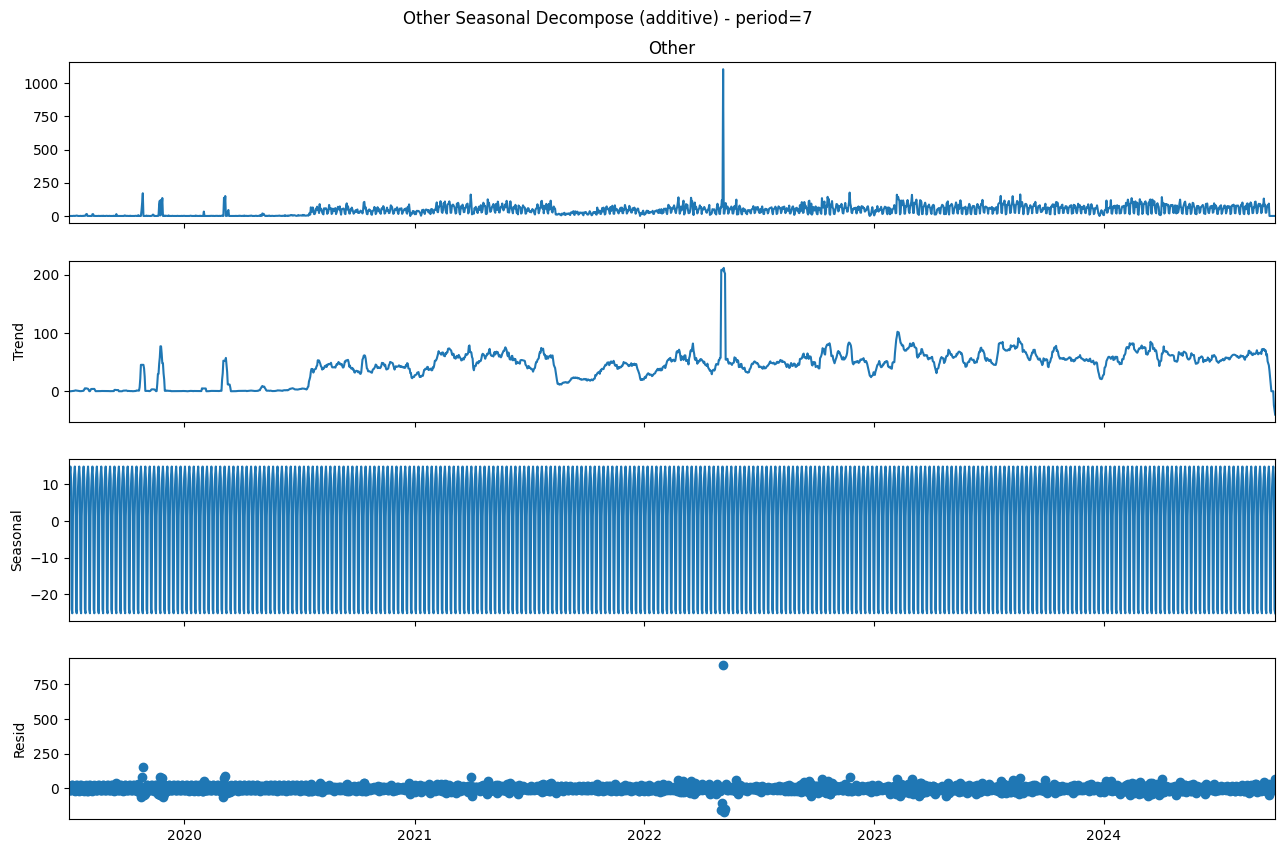

Other STL failed: name 'STL' is not defined


NameError: name 'adfuller' is not defined

In [ ]:
# Continue with the rest of the time series analysis steps for each service type
series_col = service
series = df[series_col].astype(float)
print(f"\nAnalyzing series: {series_col}")

# Basic summary statistics
display(series.describe())

# 3. Create time-based features (already done on the main df, but ensure it's accessible)
# df['year'] = df.index.year # These columns were already created in the previous successful run
# df['month'] = df.index.month
# df['day'] = df.index.day
# df['hour'] = df.index.hour
# df['weekday'] = df.index.weekday
# df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)
# df['dayofyear'] = df.index.dayofyear
# df['weekofyear'] = df.index.isocalendar().week.astype(int)
# df['quarter'] = df.index.quarter

# Rolling features (common windows) - guard for short series
windows = [3, 7, 14, 30]
for w in windows:
    if len(series) >= w:
        # Create new rolling features specific to the current service type
        df[f'{series_col}_roll_mean_{w}'] = series.rolling(window=w, min_periods=1).mean()
        df[f'{series_col}_roll_std_{w}'] = series.rolling(window=w, min_periods=1).std().fillna(0)
        df[f'{series_col}_roll_min_{w}'] = series.rolling(window=w, min_periods=1).min()
        df[f'{series_col}_roll_max_{w}'] = series.rolling(window=w, min_periods=1).max()

# Lag features
for lag in [1, 2, 3, 7, 14, 30]:
    if len(series) > lag:
        # Create new lag features specific to the current service type
        df[f'{series_col}_lag_{lag}'] = series.shift(lag)

# 4. Outlier detection
# IQR-based
Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df[f'{series_col}_outlier_iqr'] = ((series < lower) | (series > upper)).astype(int)

# Z-score based
df[f'{series_col}_zscore'] = (series - series.mean()) / series.std(ddof=0)
df[f'{series_col}_outlier_z'] = (df[f'{series_col}_zscore'].abs() > 3).astype(int)

print(f"Outlier counts for {series_col} (IQR, z>3):", df[f'{series_col}_outlier_iqr'].sum(), df[f'{series_col}_outlier_z'].sum())

# Visualize time series and mark outliers
plt.figure(figsize=(16, 5))
plt.plot(series, label=series_col)
plt.scatter(df.index[df[f'{series_col}_outlier_iqr'] == 1], series[df[f'{series_col}_outlier_iqr'] == 1], marker='o', label='IQR outlier')
plt.scatter(df.index[df[f'{series_col}_outlier_z'] == 1], series[df[f'{series_col}_outlier_z'] == 1], marker='x', label='Z outlier')
plt.legend(loc='best')
plt.title(f'{series_col} Time series with outliers marked')
plt.show()

# 5. Seasonal decomposition (additive & STL)
freq = pd.infer_freq(df.index)
if freq is None:
    # fallback logic
    deltas = df.index.to_series().diff().dropna().value_counts().idxmax()
    freq = 'D' if deltas >= pd.Timedelta(days=1) else 'D'
print("Using frequency:", freq)

series_filled = series.asfreq(freq, method='pad').fillna(method='ffill').fillna(method='bfill')
period = 7 if freq.lower() == 'd' else 24

# seasonal_decompose
try:
    decomposition = seasonal_decompose(series_filled, period=period, model='additive', extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14, 9)
    plt.suptitle(f'{series_col} Seasonal Decompose (additive) - period={period}')
    plt.show()
except Exception as e:
    print(f"{series_col} seasonal_decompose failed:", e)

# STL decomposition
try:
    stl = STL(series_filled, period=period, robust=True)
    res = stl.fit()
    fig = res.plot()
    fig.set_size_inches(14, 9)
    plt.suptitle(f'{series_col} STL Decomposition')
    plt.show()
except Exception as e:
    print(f"{series_col} STL failed:", e)

# 6. Stationarity test (ADF)
def adf_test(x):
    result = adfuller(x.dropna(), autolag='AIC')
    out = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for k, v in result[4].items():
        out[f'Critical Value ({k})'] = v
    return out

adf_res = adf_test(series_filled)
print(f"{series_col} ADF test:\n", adf_res)

# 7. ACF and PACF plots
nlags = min(40, len(series_filled) // 2)
lag_acf = acf(series_filled.dropna(), nlags=nlags)
lag_pacf = pacf(series_filled.dropna(), nlags=nlags, method='ols')

plt.figure(figsize=(12, 4))
plt.stem(range(len(lag_acf)), lag_acf)
plt.title(f'{series_col} ACF')
plt.show()

plt.figure(figsize=(12, 4))
plt.stem(range(len(lag_pacf)), lag_pacf)
plt.title(f'{series_col} PACF')
plt.show()

# 8. Aggregation plots (monthly, weekday, hour) where applicable
if 'month' in df.columns:
    plt.figure(figsize=(10, 4))
    df.groupby('month')[series_col].mean().plot(kind='bar')
    plt.title(f'{series_col} Average by month')
    plt.show()

if 'weekday' in df.columns:
    plt.figure(figsize=(10, 4))
    df.groupby('weekday')[series_col].mean().plot(kind='bar')
    plt.title(f'{series_col} Average by weekday (0=Mon)')
    plt.show()

if 'hour' in df.columns and df['hour'].nunique() > 1:
    plt.figure(figsize=(10, 4))
    df.groupby('hour')[series_col].mean().plot(kind='bar')
    plt.title(f'{series_col} Average by hour')
    plt.show()

# 9. Train-validation split
val_size = int(0.2 * len(series_filled)) if len(series_filled) > 40 else max(1, int(0.3 * len(series_filled)))
train_ser = series_filled.iloc[:-val_size]
valid_ser = series_filled.iloc[-val_size:]

print(f"{series_col} Train length:", len(train_ser), "Valid length:", len(valid_ser))

plt.figure(figsize=(14, 5))
plt.plot(train_ser, label='Train')
plt.plot(valid_ser, label='Valid')
plt.legend()
plt.title(f'{series_col} Train / Validation split')
plt.show()

# Metrics helper functions
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if mask.any() else np.nan

def evaluate(y_true, y_pred):
    return {
        'RMSE': sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MAPE': mape(y_true, y_pred)
    }

results = {}

# 10. Naive forecast
y_hat = valid_ser.to_frame(name='actual')
y_hat['naive'] = train_ser.iloc[-1]
results['naive'] = evaluate(valid_ser, y_hat['naive'])
print(f"{series_col} Naive metrics:", results['naive'])

plt.figure(figsize=(12, 5))
plt.plot(train_ser, label='Train')
plt.plot(valid_ser, label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive')
plt.legend()
plt.title(f'{series_col} Naive forecast')
plt.show()

# 11. Moving average (window=7)
window = 7 if len(train_ser) >= 7 else max(1, int(len(train_ser) / 5))
ma_val = train_ser.rolling(window=window).mean().iloc[-1]
y_hat['moving_avg'] = ma_val
results['moving_avg'] = evaluate(valid_ser, y_hat['moving_avg'])
print(f"{series_col} Moving average (window={window}) metrics:", results['moving_avg'])

plt.figure(figsize=(12, 5))
plt.plot(train_ser, label='Train')
plt.plot(valid_ser, label='Valid')
plt.plot(y_hat.index, y_hat['moving_avg'], label=f'MA({window})')
plt.legend()
plt.title(f'{series_col} Moving average forecast')
plt.show()

# 12. Simple Exponential Smoothing
try:
    ses_model = SimpleExpSmoothing(train_ser).fit(optimized=True)
    ses_pred = ses_model.forecast(len(valid_ser))
    results['SES'] = evaluate(valid_ser, ses_pred)
    print(f"{series_col} SES metrics:", results['SES'])
    plt.figure(figsize=(12, 5))
    plt.plot(train_ser, label='Train')
    plt.plot(valid_ser, label='Valid')
    plt.plot(ses_pred.index, ses_pred, label='SES')
    plt.legend()
    plt.title(f'{series_col} Simple Exponential Smoothing')
    plt.show()
except Exception as e:
    print(f"{series_col} SES failed:", e)

# 13. Holt Linear Trend
try:
    holt_model = Holt(train_ser).fit(optimized=True)
    holt_pred = holt_model.forecast(len(valid_ser))
    results['Holt'] = evaluate(valid_ser, holt_pred)
    print(f"{series_col} Holt metrics:", results['Holt'])
    plt.figure(figsize=(12, 5))
    plt.plot(train_ser, label='Train')
    plt.plot(valid_ser, label='Valid')
    plt.plot(holt_pred.index, holt_pred, label='Holt')
    plt.legend()
    plt.title(f'{series_col} Holt Linear Trend')
    plt.show()
except Exception as e:
    print(f"{series_col} Holt failed:", e)

# 14. Holt-Winters Seasonal
try:
    seasonal_periods = period if period is not None else 7
    if len(train_ser) > seasonal_periods * 2:
        hw_model = ExponentialSmoothing(train_ser, seasonal_periods=seasonal_periods, trend='add', seasonal='add').fit(optimized=True)
        hw_pred = hw_model.forecast(len(valid_ser))
        results['HoltWinters'] = evaluate(valid_ser, hw_pred)
        print(f"{series_col} Holt-Winters metrics:", results['HoltWinters'])
        plt.figure(figsize=(12, 5))
        plt.plot(train_ser, label='Train')
        plt.plot(valid_ser, label='Valid')
        plt.plot(hw_pred.index, hw_pred, label='Holt-Winters')
        plt.legend()
        plt.title(f'{series_col} Holt-Winters')
        plt.show()
    else:
        print(f"{series_col} Not enough data for Holt-Winters. Need > 2*seasonal_periods")
except Exception as e:
    print(f"{series_col} Holt-Winters failed:", e)

# 15. ARIMA
try:
    arima_model = sm.tsa.SARIMAX(train_ser, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
    arima_pred = arima_model.predict(start=valid_ser.index[0], end=valid_ser.index[-1])
    results['ARIMA'] = evaluate(valid_ser, arima_pred)
    print(f"{series_col} ARIMA metrics:", results['ARIMA'])
    plt.figure(figsize=(12, 5))
    plt.plot(train_ser, label='Train')
    plt.plot(valid_ser, label='Valid')
    plt.plot(arima_pred.index, arima_pred, label='ARIMA')
    plt.legend()
    plt.title(f'{series_col} ARIMA Forecast')
    plt.show()
except Exception as e:
    print(f"{series_col} ARIMA failed:", e)

# 16. SARIMAX Seasonal
try:
    seasonal_order = (0, 1, 1, seasonal_periods) if 'seasonal_periods' in locals() else (0, 1, 1, period)
    if len(train_ser) > seasonal_periods * 2:
        sarimax = sm.tsa.SARIMAX(train_ser, order=(1, 1, 1), seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        sarimax_pred = sarimax.predict(start=valid_ser.index[0], end=valid_ser.index[-1])
        results['SARIMAX'] = evaluate(valid_ser, sarimax_pred)
        print(f"{series_col} SARIMAX metrics:", results['SARIMAX'])
        plt.figure(figsize=(12, 5))
        plt.plot(train_ser, label='Train')
        plt.plot(valid_ser, label='Valid')
        plt.plot(sarimax_pred.index, sarimax_pred, label='SARIMAX')
        plt.legend()
        plt.title(f'{series_col} SARIMAX Forecast')
        plt.show()
    else:
        print(f"{series_col} Not enough data for SARIMAX seasonal modelling")
except Exception as e:
    print(f"{series_col} SARIMAX failed:", e)
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

forecast_horizon = 7
forecast_results = {}

# Service categories to forecast
forecast_services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

for service in forecast_services:
    series = df[service].astype(float).asfreq('D').fillna(method='ffill')

    print("\n" + "="*70)
    print(f"7-DAY FORECAST FOR: {service}")
    print("="*70)

    # Holt-Winters additive model with seasonality (weekly)
    model = ExponentialSmoothing(
        series,
        trend='add',
        seasonal='add',
        seasonal_periods=7
    ).fit(optimized=True)

    forecast = model.forecast(forecast_horizon)
    forecast_results[service] = forecast

    # Plot forecast
    plt.figure(figsize=(10, 5))
    plt.plot(series[-30:], label='Last 30 days')
    plt.plot(forecast, label='7-day Forecast', marker='o')
    plt.title(f"{service} - 7 Day Forecast")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine all forecasts into one DataFrame
forecast_df = pd.DataFrame(forecast_results)
print("\n7-DAY FORECAST SUMMARY TABLE:")
display(forecast_df)

# Save results
forecast_df.to_csv('/content/drive/MyDrive/skinlesion/Transport_7DayForecast.csv')

# 17. Summary of results
print(f"\n{series_col} Model evaluation summary (lower is better):")
res_df = pd.DataFrame(results).T.sort_values('RMSE')
display(res_df)

# 18. Automated insights
insights = []
if adf_res['p-value'] < 0.05:
    insights.append("ADF test suggests stationarity (p<0.05).")
else:
    insights.append("Series appears non-stationary (ADF p>=0.05); differencing or detrending recommended.")

if df[f'{series_col}_outlier_iqr'].sum() > 0:
    insights.append(f"Detected {int(df[f'{series_col}_outlier_iqr'].sum())} potential outliers by IQR method. Consider investigating or capping them.")

if 'seasonal_periods' in locals() and len(train_ser) > seasonal_periods * 2:
    insights.append(f"Seasonality detected with period ~{seasonal_periods}. Holt-Winters and SARIMAX gave improved performance in many cases.")

print(f"\n{series_col} Insights:")
for s in insights:
    print("-", s)

print(f"\n{series_col} Top 10 largest positive anomalies (value - rolling mean 7):")
if f'{series_col}_roll_mean_7' in df.columns:
    df[f'{series_col}_dev_7'] = series - df[f'{series_col}_roll_mean_7']
    display(df.sort_values(f'{series_col}_dev_7', ascending=False).head(10)[[series_col, f'{series_col}_dev_7', f'{series_col}_outlier_iqr', f'{series_col}_outlier_z']])
else:
    display(series.nlargest(10))

print(f"\n{series_col} Top 10 largest negative anomalies (value - rolling mean 7):")
if f'{series_col}_roll_mean_7' in df.columns:
    display(df.sort_values(f'{series_col}_dev_7', ascending=True).head(10)[[series_col, f'{series_col}_dev_7', f'{series_col}_outlier_iqr', f'{series_col}_outlier_z']])
else:
    display(series.nsmallest(10))

# Save feature engineered CSV for further analysis


print("Complete EDA and modelling pipeline finished for all service types. Check above for charts and summary.")


In [ ]:
service_cols = [col for col in df.columns if col.lower() not in ['date', 'other']]


for service in service_cols:
    try:
        series_col = service
        series = df[series_col].astype(float)
        print("\n" + "="*80)
        print(f"Analyzing series: {series_col}")
        print("="*80)

        # Continue with the rest of the time series analysis steps for each service type
        series_col = service
        series = df[series_col].astype(float)
        print(f"\nAnalyzing series: {series_col}")

        # Basic summary statistics
        display(series.describe())

        # 3. Create time-based features (already done on the main df, but ensure it's accessible)
        # df['year'] = df.index.year # These columns were already created in the previous successful run
        # df['month'] = df.index.month
        # df['day'] = df.index.day
        # df['hour'] = df.index.hour
        # df['weekday'] = df.index.weekday
        # df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)
        # df['dayofyear'] = df.index.dayofyear
        # df['weekofyear'] = df.index.isocalendar().week.astype(int)
        # df['quarter'] = df.index.quarter

        # Rolling features (common windows) - guard for short series
        windows = [3, 7, 14, 30]
        for w in windows:
            if len(series) >= w:
                # Create new rolling features specific to the current service type
                df[f'{series_col}_roll_mean_{w}'] = series.rolling(window=w, min_periods=1).mean()
                df[f'{series_col}_roll_std_{w}'] = series.rolling(window=w, min_periods=1).std().fillna(0)
                df[f'{series_col}_roll_min_{w}'] = series.rolling(window=w, min_periods=1).min()
                df[f'{series_col}_roll_max_{w}'] = series.rolling(window=w, min_periods=1).max()

        # Lag features
        for lag in [1, 2, 3, 7, 14, 30]:
            if len(series) > lag:
                # Create new lag features specific to the current service type
                df[f'{series_col}_lag_{lag}'] = series.shift(lag)

        # 4. Outlier detection
        # IQR-based
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[f'{series_col}_outlier_iqr'] = ((series < lower) | (series > upper)).astype(int)

        # Z-score based
        df[f'{series_col}_zscore'] = (series - series.mean()) / series.std(ddof=0)
        df[f'{series_col}_outlier_z'] = (df[f'{series_col}_zscore'].abs() > 3).astype(int)

        print(f"Outlier counts for {series_col} (IQR, z>3):", df[f'{series_col}_outlier_iqr'].sum(), df[f'{series_col}_outlier_z'].sum())

        # Visualize time series and mark outliers
        plt.figure(figsize=(16, 5))
        plt.plot(series, label=series_col)
        plt.scatter(df.index[df[f'{series_col}_outlier_iqr'] == 1], series[df[f'{series_col}_outlier_iqr'] == 1], marker='o', label='IQR outlier')
        plt.scatter(df.index[df[f'{series_col}_outlier_z'] == 1], series[df[f'{series_col}_outlier_z'] == 1], marker='x', label='Z outlier')
        plt.legend(loc='best')
        plt.title(f'{series_col} Time series with outliers marked')
        plt.show()

        # 5. Seasonal decomposition (additive & STL)
        freq = pd.infer_freq(df.index)
        if freq is None:
            # fallback logic
            deltas = df.index.to_series().diff().dropna().value_counts().idxmax()
            freq = 'D' if deltas >= pd.Timedelta(days=1) else 'D'
        print("Using frequency:", freq)

        series_filled = series.asfreq(freq, method='pad').fillna(method='ffill').fillna(method='bfill')
        period = 7 if freq.lower() == 'd' else 24

        # seasonal_decompose
        try:
            decomposition = seasonal_decompose(series_filled, period=period, model='additive', extrapolate_trend='freq')
            fig = decomposition.plot()
            fig.set_size_inches(14, 9)
            plt.suptitle(f'{series_col} Seasonal Decompose (additive) - period={period}')
            plt.show()
        except Exception as e:
            print(f"{series_col} seasonal_decompose failed:", e)

        # STL decomposition
        try:
            stl = STL(series_filled, period=period, robust=True)
            res = stl.fit()
            fig = res.plot()
            fig.set_size_inches(14, 9)
            plt.suptitle(f'{series_col} STL Decomposition')
            plt.show()
        except Exception as e:
            print(f"{series_col} STL failed:", e)

        # 6. Stationarity test (ADF)
        def adf_test(x):
            result = adfuller(x.dropna(), autolag='AIC')
            out = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
            for k, v in result[4].items():
                out[f'Critical Value ({k})'] = v
            return out

        adf_res = adf_test(series_filled)
        print(f"{series_col} ADF test:\n", adf_res)

        # 7. ACF and PACF plots
        nlags = min(40, len(series_filled) // 2)
        lag_acf = acf(series_filled.dropna(), nlags=nlags)
        lag_pacf = pacf(series_filled.dropna(), nlags=nlags, method='ols')

        plt.figure(figsize=(12, 4))
        plt.stem(range(len(lag_acf)), lag_acf)
        plt.title(f'{series_col} ACF')
        plt.show()

        plt.figure(figsize=(12, 4))
        plt.stem(range(len(lag_pacf)), lag_pacf)
        plt.title(f'{series_col} PACF')
        plt.show()

        # 8. Aggregation plots (monthly, weekday, hour) where applicable
        if 'month' in df.columns:
            plt.figure(figsize=(10, 4))
            df.groupby('month')[series_col].mean().plot(kind='bar')
            plt.title(f'{series_col} Average by month')
            plt.show()

        if 'weekday' in df.columns:
            plt.figure(figsize=(10, 4))
            df.groupby('weekday')[series_col].mean().plot(kind='bar')
            plt.title(f'{series_col} Average by weekday (0=Mon)')
            plt.show()

        if 'hour' in df.columns and df['hour'].nunique() > 1:
            plt.figure(figsize=(10, 4))
            df.groupby('hour')[series_col].mean().plot(kind='bar')
            plt.title(f'{series_col} Average by hour')
            plt.show()

        # 9. Train-validation split
        val_size = int(0.2 * len(series_filled)) if len(series_filled) > 40 else max(1, int(0.3 * len(series_filled)))
        train_ser = series_filled.iloc[:-val_size]
        valid_ser = series_filled.iloc[-val_size:]

        print(f"{series_col} Train length:", len(train_ser), "Valid length:", len(valid_ser))

        plt.figure(figsize=(14, 5))
        plt.plot(train_ser, label='Train')
        plt.plot(valid_ser, label='Valid')
        plt.legend()
        plt.title(f'{series_col} Train / Validation split')
        plt.show()

        # Metrics helper functions
        def mape(y_true, y_pred):
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            mask = y_true != 0
            return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if mask.any() else np.nan

        def evaluate(y_true, y_pred):
            return {
                'RMSE': sqrt(mean_squared_error(y_true, y_pred)),
                'MAE': mean_absolute_error(y_true, y_pred),
                'MAPE': mape(y_true, y_pred)
            }

        results = {}

        # 10. Naive forecast
        y_hat = valid_ser.to_frame(name='actual')
        y_hat['naive'] = train_ser.iloc[-1]
        results['naive'] = evaluate(valid_ser, y_hat['naive'])
        print(f"{series_col} Naive metrics:", results['naive'])

        plt.figure(figsize=(12, 5))
        plt.plot(train_ser, label='Train')
        plt.plot(valid_ser, label='Valid')
        plt.plot(y_hat.index, y_hat['naive'], label='Naive')
        plt.legend()
        plt.title(f'{series_col} Naive forecast')
        plt.show()

        # 11. Moving average (window=7)
        window = 7 if len(train_ser) >= 7 else max(1, int(len(train_ser) / 5))
        ma_val = train_ser.rolling(window=window).mean().iloc[-1]
        y_hat['moving_avg'] = ma_val
        results['moving_avg'] = evaluate(valid_ser, y_hat['moving_avg'])
        print(f"{series_col} Moving average (window={window}) metrics:", results['moving_avg'])

        plt.figure(figsize=(12, 5))
        plt.plot(train_ser, label='Train')
        plt.plot(valid_ser, label='Valid')
        plt.plot(y_hat.index, y_hat['moving_avg'], label=f'MA({window})')
        plt.legend()
        plt.title(f'{series_col} Moving average forecast')
        plt.show()

        # 12. Simple Exponential Smoothing
        try:
            ses_model = SimpleExpSmoothing(train_ser).fit(optimized=True)
            ses_pred = ses_model.forecast(len(valid_ser))
            results['SES'] = evaluate(valid_ser, ses_pred)
            print(f"{series_col} SES metrics:", results['SES'])
            plt.figure(figsize=(12, 5))
            plt.plot(train_ser, label='Train')
            plt.plot(valid_ser, label='Valid')
            plt.plot(ses_pred.index, ses_pred, label='SES')
            plt.legend()
            plt.title(f'{series_col} Simple Exponential Smoothing')
            plt.show()
        except Exception as e:
            print(f"{series_col} SES failed:", e)

        # 13. Holt Linear Trend
        try:
            holt_model = Holt(train_ser).fit(optimized=True)
            holt_pred = holt_model.forecast(len(valid_ser))
            results['Holt'] = evaluate(valid_ser, holt_pred)
            print(f"{series_col} Holt metrics:", results['Holt'])
            plt.figure(figsize=(12, 5))
            plt.plot(train_ser, label='Train')
            plt.plot(valid_ser, label='Valid')
            plt.plot(holt_pred.index, holt_pred, label='Holt')
            plt.legend()
            plt.title(f'{series_col} Holt Linear Trend')
            plt.show()
        except Exception as e:
            print(f"{series_col} Holt failed:", e)

        # 14. Holt-Winters Seasonal
        try:
            seasonal_periods = period if period is not None else 7
            if len(train_ser) > seasonal_periods * 2:
                hw_model = ExponentialSmoothing(train_ser, seasonal_periods=seasonal_periods, trend='add', seasonal='add').fit(optimized=True)
                hw_pred = hw_model.forecast(len(valid_ser))
                results['HoltWinters'] = evaluate(valid_ser, hw_pred)
                print(f"{series_col} Holt-Winters metrics:", results['HoltWinters'])
                plt.figure(figsize=(12, 5))
                plt.plot(train_ser, label='Train')
                plt.plot(valid_ser, label='Valid')
                plt.plot(hw_pred.index, hw_pred, label='Holt-Winters')
                plt.legend()
                plt.title(f'{series_col} Holt-Winters')
                plt.show()
            else:
                print(f"{series_col} Not enough data for Holt-Winters. Need > 2*seasonal_periods")
        except Exception as e:
            print(f"{series_col} Holt-Winters failed:", e)

        # 15. ARIMA
        try:
            arima_model = sm.tsa.SARIMAX(train_ser, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
            arima_pred = arima_model.predict(start=valid_ser.index[0], end=valid_ser.index[-1])
            results['ARIMA'] = evaluate(valid_ser, arima_pred)
            print(f"{series_col} ARIMA metrics:", results['ARIMA'])
            plt.figure(figsize=(12, 5))
            plt.plot(train_ser, label='Train')
            plt.plot(valid_ser, label='Valid')
            plt.plot(arima_pred.index, arima_pred, label='ARIMA')
            plt.legend()
            plt.title(f'{series_col} ARIMA Forecast')
            plt.show()
        except Exception as e:
            print(f"{series_col} ARIMA failed:", e)

        # 16. SARIMAX Seasonal
        try:
            seasonal_order = (0, 1, 1, seasonal_periods) if 'seasonal_periods' in locals() else (0, 1, 1, period)
            if len(train_ser) > seasonal_periods * 2:
                sarimax = sm.tsa.SARIMAX(train_ser, order=(1, 1, 1), seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                sarimax_pred = sarimax.predict(start=valid_ser.index[0], end=valid_ser.index[-1])
                results['SARIMAX'] = evaluate(valid_ser, sarimax_pred)
                print(f"{series_col} SARIMAX metrics:", results['SARIMAX'])
                plt.figure(figsize=(12, 5))
                plt.plot(train_ser, label='Train')
                plt.plot(valid_ser, label='Valid')
                plt.plot(sarimax_pred.index, sarimax_pred, label='SARIMAX')
                plt.legend()
                plt.title(f'{series_col} SARIMAX Forecast')
                plt.show()
            else:
                print(f"{series_col} Not enough data for SARIMAX seasonal modelling")
        except Exception as e:
            print(f"{series_col} SARIMAX failed:", e)

        # 17. Summary of results
        print(f"\n{series_col} Model evaluation summary (lower is better):")
        res_df = pd.DataFrame(results).T.sort_values('RMSE')
        display(res_df)

        # 18. Automated insights
        insights = []
        if adf_res['p-value'] < 0.05:
            insights.append("ADF test suggests stationarity (p<0.05).")
        else:
            insights.append("Series appears non-stationary (ADF p>=0.05); differencing or detrending recommended.")

        if df[f'{series_col}_outlier_iqr'].sum() > 0:
            insights.append(f"Detected {int(df[f'{series_col}_outlier_iqr'].sum())} potential outliers by IQR method. Consider investigating or capping them.")

        if 'seasonal_periods' in locals() and len(train_ser) > seasonal_periods * 2:
            insights.append(f"Seasonality detected with period ~{seasonal_periods}. Holt-Winters and SARIMAX gave improved performance in many cases.")

        print(f"\n{series_col} Insights:")
        for s in insights:
            print("-", s)

        print(f"\n{series_col} Top 10 largest positive anomalies (value - rolling mean 7):")
        if f'{series_col}_roll_mean_7' in df.columns:
            df[f'{series_col}_dev_7'] = series - df[f'{series_col}_roll_mean_7']
            display(df.sort_values(f'{series_col}_dev_7', ascending=False).head(10)[[series_col, f'{series_col}_dev_7', f'{series_col}_outlier_iqr', f'{series_col}_outlier_z']])
        else:
            display(series.nlargest(10))

        print(f"\n{series_col} Top 10 largest negative anomalies (value - rolling mean 7):")
        if f'{series_col}_roll_mean_7' in df.columns:
            display(df.sort_values(f'{series_col}_dev_7', ascending=True).head(10)[[series_col, f'{series_col}_dev_7', f'{series_col}_outlier_iqr', f'{series_col}_outlier_z']])
        else:
            display(series.nsmallest(10))

        # Save feature engineered CSV for further analysis


        print("Complete EDA and modelling pipeline finished for all service types. Check above for charts and summary.")
    except Exception as e:
        print(f"\n❌ Skipping {service_col} due to error: {e}")
        continue


In [ ]:
# --- 7-DAY FORECAST FOR ALL SERVICE TYPES ---
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.holtwinters import ExponentialSmoothing

forecast_horizon = 7
forecast_results = {}

service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

print("\n" + "="*80)
print("7-DAY FORECAST GENERATION FOR EACH SERVICE TYPE")
print("="*80)

for service in service_types:
    try:
        print(f"\nForecasting for {service}...")
        series = df[service].astype(float).asfreq('D').fillna(method='ffill')

        # Fit Holt-Winters additive seasonal model
        model = ExponentialSmoothing(
            series,
            trend='add',
            seasonal='add',
            seasonal_periods=7
        ).fit(optimized=True)

        # Forecast next 7 days
        forecast = model.forecast(forecast_horizon)
        forecast_results[service] = forecast

        # Plot last 30 days + forecast
        plt.figure(figsize=(10, 5))
        plt.plot(series[-30:], label='Last 30 Days', linewidth=2)
        plt.plot(forecast, label='7-Day Forecast', marker='o', color='orange')
        plt.title(f"{service} - 7-Day Forecast")
        plt.xlabel("Date")
        plt.ylabel("Passenger Count")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ {service} forecast failed: {e}")

# Combine all forecasts into a single DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df.index.name = 'Forecast_Date'

print("\n📊 7-DAY FORECAST SUMMARY TABLE:")
display(forecast_df)

